# An Introduction to Association Rules in Python

##### Association rules is a rule-based learning method used to draw frequent patterns and correlations from datasets such as transactional and relational data.

##### In essence it computes the co-occurence statistics between items, in the form of an implication expression (X → Y).

##### For instance, in customer basket analysis, {diaper} → {beer} means if diaper is bought, then beer is put into basket.

#### 4 fundamental concepts in association rules:

* *(Not a Rule)* Support: number of times X occurs over all instances. 

* Support(X→Y) is the probability of co-occurence of both items within all data.

* Confidence(X→Y) is the probability of Y occurs given that X is present.

* Lift(X→Y) is the probability of Y being bought given that X is present, taking into account the popularity of Y as well.

* Conviction(X→Y) is the measure of implication. A value > 1 indicates that Y is highly depending on X.

So basically it is probability/statistics. A simple but useful decision making tool for a wide range of usages such as market basket analysis, customer relationship management, recommender system, marketing activities, network traffic analysis, intrusion detection (fraud & malware detection) and bioinformatics.


# Example 1

### Before getting into the formnulas and terminology, let's begin by a simple example.

Mlxtend is a rich and useful library for machine learning. It provides methods in association rules with a major algorithm *apriori*.

You can install mlxtend via pip or conda.

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

To use association rules, first we neeed some data in one-hot encoded format.

Imagine in a grocery database, there are order id with some products...

In [3]:
data = {'ID':[1,2,3,4,5,6],
       'Onion':[1,0,0,1,1,1],
       'Potato':[1,1,0,1,1,1],
       'Burger':[1,1,0,0,1,1],
       'Milk':[0,1,1,1,0,1],
       'Beer':[0,0,1,0,1,0]}

In [4]:
df = pd.DataFrame(data)

In [5]:
df = df[['ID', 'Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]]

In [6]:
df


,ID,Onion,Potato,Burger,Milk,Beer
0,1,1,1,1,0,0
1,2,0,1,1,1,0
2,3,0,0,0,1,1
3,4,1,1,0,1,0
4,5,1,1,1,0,1
5,6,1,1,1,1,0


### Then, we can generate frequent itemsets based on *support*.

Here we need to set the minimum support value between [0,1]. Using min_supp = 50% means we only want itemsets that co-occur more than half of the time.

`apriori(df, min_support=0.5, use_colnames=False, max_len=None)`

In [7]:
frequent_itemsets = apriori(df[['Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]], min_support=0.50, use_colnames=True)

e:\anaconda\Anaconda\envs\apriorienv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [8]:
frequent_itemsets

,support,itemsets
0,0.666667,(Onion)
1,0.833333,(Potato)
2,0.666667,(Burger)
3,0.666667,(Milk)
4,0.666667,"(Potato, Onion)"
5,0.500000,"(Burger, Onion)"
6,0.666667,"(Potato, Burger)"
7,0.500000,"(Potato, Milk)"
8,0.500000,"(Potato, Onion, Burger)"


Itemsets with 1, 2 or 3 items are returned, with support > 0.5

The only itemset with 3 products is [Onion, Potato, Burger].

### Final Step: generate the rules with their corresponding support, confidence and lift, (and leverage & conviction):

```association_rules(df, metric='confidence', min_threshold=0.8)```

* Here, df means the frequent_itemsets dataframe; 

* metrics is the parameters to consider if there is association. You can set it to one of the five metrics.

* min_threshold is the mininum value for the specified metrics.

In [20]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)

In [21]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Potato),(Onion),0.833333,0.666667,0.666667,0.80,1.200,1.0,0.111111,1.666667,1.000000,0.8,0.40,0.900
1,(Onion),(Potato),0.666667,0.833333,0.666667,1.00,1.200,1.0,0.111111,inf,0.500000,0.8,1.00,0.900
2,(Burger),(Onion),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.750
3,(Onion),(Burger),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.750
4,(Potato),(Burger),0.833333,0.666667,0.666667,0.80,1.200,1.0,0.111111,1.666667,1.000000,0.8,0.40,0.900
5,(Burger),(Potato),0.666667,0.833333,0.666667,1.00,1.200,1.0,0.111111,inf,0.500000,0.8,1.00,0.900
6,(Potato),(Milk),0.833333,0.666667,0.500000,0.60,0.900,1.0,-0.055556,0.833333,-0.400000,0.5,-0.20,0.675
7,(Milk),(Potato),0.666667,0.833333,0.500000,0.75,0.900,1.0,-0.055556,0.666667,-0.250000,0.5,-0.50,0.675
8,"(Potato, Onion)",(Burger),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.750
9,"(Potato, Burger)",(Onion),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.750


### Intrepreting the result:

We can see that there are quite a few rules with a high lift value which means that it occurs more frequently than would be expected given the number of transaction and product combinations.

Several are high in confidence as well. But domain knowledge will be useful in explaining the phenomenon.

In [22]:
rules [ (rules['lift'] >1.125)  & (rules['confidence']>=1)  ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Onion),(Potato),0.666667,0.833333,0.666667,1.0,1.2,1.0,0.111111,inf,0.500000,0.8,1.0,0.9
5,(Burger),(Potato),0.666667,0.833333,0.666667,1.0,1.2,1.0,0.111111,inf,0.500000,0.8,1.0,0.9
10,"(Burger, Onion)",(Potato),0.500000,0.833333,0.500000,1.0,1.2,1.0,0.083333,inf,0.333333,0.6,1.0,0.8


Subsetting the lift and confidence values return you with the itemsets that are relatively highly correlated in this data.

We can see that:

* **If Onion or Burger is in a users' basket, it is highly likely that the user will buy Potato as well.**
* **If Burger and Onion is in a users' basket, it is highly likely that the user will also buy Potato.**

### How we come up with these interpretations? Let's look at the formulas of each terminology:

<img src="tables-of-definitions-and-properties-of-association-rules-measures.png" width='600' height='400'/>

This single picture clearly illustrates all the mathematical definitions & probablistic interpretation of each rule. 

It also states the min/max & independent values.

### Some notes on Lift, Conviction & Leverage:


1.  Lift(X→Y) : the likelihood of Y being bought when X is present, taking into account the popularity of Y as well.
    > When Lift=1,  X makes no impact on Y  
    > When Lift>1, there is a relationship between X & Y
2.  Conviction(X→Y): Conviction is a measure of the implication and has value 1 if items are unrelated.
    > A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.
3.  Leverage(X→Y): the difference between the observed frequency of X and Y appearing together and the frequency that would be expected if X and Y were independent. An leverage value of 0 indicates independence.

# Example 2

In [39]:
retail_shopping_basket = {'ID':[1,2,3,4,5,6],
                         'Basket':[['Beer', 'Diaper', 'Pretzels', 'Chips', 'Aspirin'],
                                   ['Diaper', 'Beer', 'Chips', 'Lotion', 'Juice', 'BabyFood', 'Milk'],
                                   ['Soda', 'Chips', 'Milk'],
                                   ['Soup', 'Beer', 'Diaper', 'Milk', 'IceCream'],
                                   ['Soda', 'Coffee', 'Milk', 'Bread'],
                                   ['Beer', 'Chips']
                                  ]
                         }

In [40]:
retail = pd.DataFrame(retail_shopping_basket)

In [41]:
retail = retail[['ID', 'Basket']]

In [42]:
pd.options.display.max_colwidth=100

Suppose we have a list of customer ids to a list of basket items:

In [43]:
retail

,ID,Basket
0,1,"[Beer, Diaper, Pretzels, Chips, Aspirin]"
1,2,"[Diaper, Beer, Chips, Lotion, Juice, BabyFood, Milk]"
2,3,"[Soda, Chips, Milk]"
3,4,"[Soup, Beer, Diaper, Milk, IceCream]"
4,5,"[Soda, Coffee, Milk, Bread]"
5,6,"[Beer, Chips]"


First one-hot encode the basket, but how?

In [48]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
retail =pd.DataFrame(mlb.fit_transform(retail.Basket), columns=mlb.classes_)

In [ ]:
retail = retail.drop('Basket',axis=1).join(retail.Basket.str.join(',').str.get_dummies(',')) # ne pas utiliser maniere non propre

In [49]:
retail

,Aspirin,BabyFood,Beer,Bread,Chips,Coffee,Diaper,IceCream,Juice,Lotion,Milk,Pretzels,Soda,Soup
0,1,0,1,0,1,0,1,0,0,0,0,1,0,0
1,0,1,1,0,1,0,1,0,1,1,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,1,0,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,1,0,1,0
5,0,0,1,0,1,0,0,0,0,0,0,0,0,0


Making use of `Series.str.get_dummies`, we can easily encode lists of items in a dataframe's column!

In [51]:
frequent_itemsets_2 = apriori(retail, use_colnames=True)

e:\anaconda\Anaconda\envs\apriorienv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [52]:
frequent_itemsets_2

,support,itemsets
0,0.666667,(Beer)
1,0.666667,(Chips)
2,0.500000,(Diaper)
3,0.666667,(Milk)
4,0.500000,"(Chips, Beer)"
5,0.500000,"(Beer, Diaper)"


Just by calculating the support(X>Y), [Beer, Chips] & [Beer, Diaper] are the two frequent basket of intereseted.

But which one is more correlated than the other?

In [53]:
association_rules(frequent_itemsets_2, metric='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Chips),(Beer),0.666667,0.666667,0.5,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.60,0.25,0.750
1,(Beer),(Chips),0.666667,0.666667,0.5,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.60,0.25,0.750
2,(Beer),(Diaper),0.666667,0.500000,0.5,0.75,1.500,1.0,0.166667,2.000000,1.000000,0.75,0.50,0.875
3,(Diaper),(Beer),0.500000,0.666667,0.5,1.00,1.500,1.0,0.166667,inf,0.666667,0.75,1.00,0.875


In [54]:
association_rules(frequent_itemsets_2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Diaper),(Beer),0.5,0.666667,0.5,1.0,1.5,1.0,0.166667,inf,0.666667,0.75,1.0,0.875


What can you discover from the two rules? *(Tips: what are the default parameters?)*

Clearly, {Diaper, Beer} is the most associated itemset in this data!

# Example 3 - Movie Genre Associations

It seems a bit boring playing only with basket analysis and imaginary datasets.

In this example, let's play with an open dataset [MovieLens (small)](https://grouplens.org/datasets/movielens/).

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100004 ratings and 1296 tag applications across 9125 movies. These data were created by 671 users between January 09, 1995 and October 16, 2016.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

We might want to take a look at the data and look at the stat first:

In [55]:
movies = pd.read_csv('ml-latest-small/movies.csv')

In [56]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
movies_ohe = movies.drop('genres',axis=1).join(movies.genres.str.get_dummies()) #suprime genre et get_dummies crees des entre 0/1 pour chaque genre

In [58]:
pd.options.display.max_columns=100

In [59]:
movies_ohe.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
stat1 = movies_ohe.drop(['title', 'movieId'],axis=1).apply(pd.value_counts)

C:\Users\propa\AppData\Local\Temp\ipykernel_14856\1177173523.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  stat1 = movies_ohe.drop(['title', 'movieId'],axis=1).apply(pd.value_counts)


In [62]:
stat1.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,9107,7580,8008,8678,8542,5810,8025,8630,4760,8471,8992,8248,8972,8731,8582,7580,8333,7396,8758,8957
1,18,1545,1117,447,583,3315,1100,495,4365,654,133,877,153,394,543,1545,792,1729,367,168


In [ ]:
stat1 = stat1.transpose().drop(0,axis=1).sort_values(by=1, ascending=False).rename(columns={1:'No. of movies'}) #transpose fait une rotation de la table, drop vide la colone 0 ,sortvalues trie

In [64]:
stat1

,No. of movies
Drama,4365
Comedy,3315
Thriller,1729
Action,1545
Romance,1545
Adventure,1117
Crime,1100
Horror,877
Sci-Fi,792
Fantasy,654


In [ ]:
stat2 = movies.join(movies.genres.str.split('|').reset_index().genres.str.len(), rsuffix='r').rename(columns={'genresr':'genre_count'}) #cree un colone genres+r avec une liste(split)dont on done la taille (len)

In [66]:
stat2

,movieId,title,genres,genre_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1
...,...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,3
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,4
9122,163949,The Beatles: Eight Days a Week - The Touring Years (2016),Documentary,1
9123,164977,The Gay Desperado (1936),Comedy,1


In [67]:
stat2 = stat2[stat2['genre_count']==1].drop('movieId',axis=1).groupby('genres').sum().sort_values(by='genre_count', ascending=False)

In [68]:
stat = stat1.merge(stat2, how='left', left_index=True, right_index=True).fillna(0)

In [69]:
stat.genre_count=stat.genre_count.astype(int)
stat.rename(columns={'genre_count': 'No. of movies with only 1 genre'},inplace=True)

In [70]:
stat

,No. of movies,title,No. of movies with only 1 genre
Drama,4365,"Nixon (1995)Othello (1995)Dangerous Minds (1995)Cry, the Beloved Country (1995)Restoration (1995...",1170
Comedy,3315,Father of the Bride Part II (1995)Four Rooms (1995)Ace Ventura: When Nature Calls (1995)Bio-Dome...,809
Thriller,1729,"Jade (1995)Safe (1995)Tie That Binds, The (1995)Hideaway (1995)Red Rock West (1992)Blink (1994)F...",74
Action,1545,"Sudden Death (1995)Fair Game (1995)Under Siege 2: Dark Territory (1995)Hunted, The (1995)Bloodsp...",39
Romance,1545,Jack and Sarah (1995)Hustler White (1996)Kama Sutra: A Tale of Love (1996)Love and Other Catastr...,14
Adventure,1117,"Mark of Zorro, The (1940)Beyond the Poseidon Adventure (1979)Brenda Starr (1989)Snows of Kiliman...",11
Crime,1100,Coup de torchon (Clean Slate) (1981)Gridlock'd (1997)Keys to Tulsa (1997)Clay Pigeons (1998)Gene...,11
Horror,877,Lord of Illusions (1995)Castle Freak (1995)Cemetery Man (Dellamorte Dellamore) (1994)Eyes Withou...,183
Sci-Fi,792,2010: The Year We Make Contact (1984)Meteor (1979)It Came from Outer Space (1953)Mission to Mars...,17
Fantasy,654,"Andalusian Dog, An (Chien andalou, Un) (1929)Eaux d'artifice (1953)Inauguration of the Pleasure ...",3


Hola! After some dizzy pandas works, we get the number of movies in each genre and the number of movies containing only 1 genre.

Text(0.5, 1.0, 'distribution of number of genres')

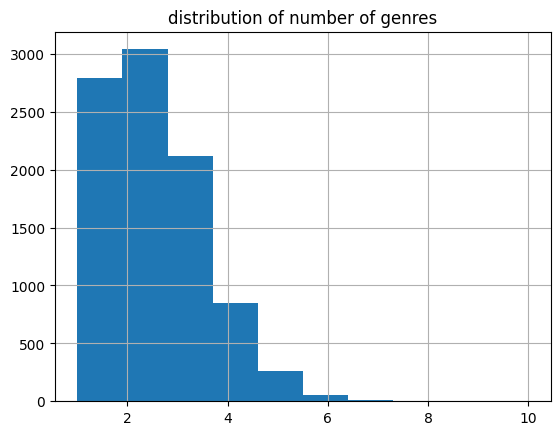

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
movies_ohe.set_index(['movieId','title']).sum(axis=1).hist()
plt.title('distribution of number of genres')

One can always makes some graphical illustration.

### Let's get back to analysing the genre associations:

In [72]:
movies_ohe.set_index(['movieId','title'],inplace=True)

In [73]:
frequent_itemsets_movies = apriori(movies_ohe,use_colnames=True, min_support=0.025)

e:\anaconda\Anaconda\envs\apriorienv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [74]:
frequent_itemsets_movies

,support,itemsets
0,0.169315,(Action)
1,0.122411,(Adventure)
2,0.048986,(Animation)
3,0.063890,(Children)
4,0.363288,(Comedy)
5,0.120548,(Crime)
6,0.054247,(Documentary)
7,0.478356,(Drama)
8,0.071671,(Fantasy)
9,0.096110,(Horror)


In [76]:
rules_movies =  association_rules(frequent_itemsets_movies, metric='lift', min_threshold=1.25)

In [77]:
rules_movies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Action),(Adventure),0.169315,0.122411,0.058301,0.344337,2.812955,1.0,0.037575,1.338475,0.775868,0.249765,0.252881,0.410306
1,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,1.0,0.037575,1.586111,0.734401,0.249765,0.369527,0.410306
2,(Action),(Crime),0.169315,0.120548,0.038247,0.225890,1.873860,1.0,0.017836,1.136081,0.561395,0.152003,0.119781,0.271581
3,(Crime),(Action),0.120548,0.169315,0.038247,0.317273,1.873860,1.0,0.017836,1.216716,0.530264,0.152003,0.178115,0.271581
4,(Action),(Sci-Fi),0.169315,0.086795,0.040986,0.242071,2.789015,1.0,0.026291,1.204870,0.772195,0.190525,0.170035,0.357147
5,(Sci-Fi),(Action),0.086795,0.169315,0.040986,0.472222,2.789015,1.0,0.026291,1.573929,0.702416,0.190525,0.364647,0.357147
6,(Action),(Thriller),0.169315,0.189479,0.062904,0.371521,1.960746,1.0,0.030822,1.289654,0.589863,0.212593,0.224598,0.351752
7,(Thriller),(Action),0.189479,0.169315,0.062904,0.331984,1.960746,1.0,0.030822,1.243510,0.604537,0.212593,0.195825,0.351752
8,(Adventure),(Children),0.122411,0.063890,0.029260,0.239033,3.741299,1.0,0.021439,1.230158,0.834916,0.186322,0.187096,0.348505
9,(Children),(Adventure),0.063890,0.122411,0.029260,0.457976,3.741299,1.0,0.021439,1.619096,0.782722,0.186322,0.382371,0.348505


***As we can see in this dataset, the support and hence confidence values are fairly small. This makes it difficult interpreting the result based on these two values. Whereas, the lift and conviction remains to very intuitive and representative. That is why we should understand the meaning of all of the 5 metrics to accurately interpret the result!***

In [78]:
rules_movies[(rules_movies.conviction>1.25)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Action),(Adventure),0.169315,0.122411,0.058301,0.344337,2.812955,1.0,0.037575,1.338475,0.775868,0.249765,0.252881,0.410306
1,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,1.0,0.037575,1.586111,0.734401,0.249765,0.369527,0.410306
5,(Sci-Fi),(Action),0.086795,0.169315,0.040986,0.472222,2.789015,1.0,0.026291,1.573929,0.702416,0.190525,0.364647,0.357147
6,(Action),(Thriller),0.169315,0.189479,0.062904,0.371521,1.960746,1.0,0.030822,1.289654,0.589863,0.212593,0.224598,0.351752
9,(Children),(Adventure),0.063890,0.122411,0.029260,0.457976,3.741299,1.0,0.021439,1.619096,0.782722,0.186322,0.382371,0.348505
10,(Fantasy),(Adventure),0.071671,0.122411,0.030685,0.428135,3.497518,1.0,0.021912,1.534608,0.769213,0.187793,0.348368,0.339403
13,(Sci-Fi),(Adventure),0.086795,0.122411,0.027726,0.319444,2.609607,1.0,0.017101,1.289519,0.675424,0.152778,0.224517,0.272972
14,(Animation),(Children),0.048986,0.063890,0.027068,0.552573,8.648758,1.0,0.023939,2.092205,0.929930,0.315453,0.522035,0.488122
15,(Children),(Animation),0.063890,0.048986,0.027068,0.423671,8.648758,1.0,0.023939,1.650122,0.944736,0.315453,0.393984,0.488122
17,(Children),(Comedy),0.063890,0.363288,0.032877,0.514580,1.416453,1.0,0.009666,1.311672,0.314077,0.083380,0.237615,0.302539


* As we are expecting the {Romance, Drama} pair, it is not as correlated as other groups such as {Animation, Childres} which has a much higher lift & conviction levels.

In [79]:
rules_movies[(rules_movies.conviction>1.5)].sort_values(by=['lift','conviction'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
14,(Animation),(Children),0.048986,0.063890,0.027068,0.552573,8.648758,1.0,0.023939,2.092205,0.929930,0.315453,0.522035,0.488122
15,(Children),(Animation),0.063890,0.048986,0.027068,0.423671,8.648758,1.0,0.023939,1.650122,0.944736,0.315453,0.393984,0.488122
9,(Children),(Adventure),0.063890,0.122411,0.029260,0.457976,3.741299,1.0,0.021439,1.619096,0.782722,0.186322,0.382371,0.348505
10,(Fantasy),(Adventure),0.071671,0.122411,0.030685,0.428135,3.497518,1.0,0.021912,1.534608,0.769213,0.187793,0.348368,0.339403
28,(Mystery),(Thriller),0.059507,0.189479,0.036055,0.605893,3.197672,1.0,0.024779,2.056601,0.730758,0.169326,0.513761,0.398088
1,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,1.0,0.037575,1.586111,0.734401,0.249765,0.369527,0.410306
5,(Sci-Fi),(Action),0.086795,0.169315,0.040986,0.472222,2.789015,1.0,0.026291,1.573929,0.702416,0.190525,0.364647,0.357147
20,(Crime),(Thriller),0.120548,0.189479,0.057863,0.480000,2.533256,1.0,0.035022,1.558693,0.688214,0.229465,0.358437,0.392689
34,"(Crime, Drama)",(Thriller),0.067616,0.189479,0.032000,0.473258,2.497673,1.0,0.019188,1.538742,0.643112,0.142162,0.350119,0.321071
24,(War),(Drama),0.040219,0.478356,0.031014,0.771117,1.612015,1.0,0.011775,2.279087,0.395568,0.063610,0.561228,0.417976


By making a subset with ordering with lift & conviction:

* The highest correlation: {Animation, Childres} correlates in both directions! Recall those Pixar & Disney films that we love watching
* {Children, Adventure} ...
* {Fantasy, Adventure} ... How to interpret these two pairs?

The best way is to go back to your movies table and check it out!

In [80]:
pd.options.display.max_rows=50

So we want Adventure & Children but NOT Animation...

In [ ]:
movies[(movies.genres.str.contains('Adventure')) & (movies.genres.str.contains('Children')) & (~movies.genres.str.contains('Animation'))] # ~ veux dire not

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
7,8,Tom and Huck (1995),Adventure|Children
56,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
98,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical
114,126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy
...,...,...,...
8871,132046,Tomorrowland (2015),Action|Adventure|Children|Mystery|Sci-Fi
8916,135264,Zenon: Girl of the 21st Century (1999),Adventure|Children|Comedy
8917,135266,Zenon: The Zequel (2001),Adventure|Children|Comedy|Sci-Fi
8918,135268,Zenon: Z3 (2004),Adventure|Children|Comedy


So, well, what are these movies? I rarely know any of them... (proves again the notion that domain knowledge is of utmost importance in data science!)

Viola, I know ***Tomorrowland (2015)***! We all know this movie, so we sort of understand why {Children, Adventure} is an associated pair. Given that this is not an animation, but its interesting and fantasy storyline in discovering the secrets of a mystic place kind of succeeded in targeting little boys and girls.

There are more to discover. Try finding an interesting pair on your own!

# Summary

To recap, a straightforward 4-steps approach to association rule:

1. One-hot encone the basket in dataframe.
2. Generate frequent itemsets using `apriori`.
3. Generate rule with `association_rules`.
4. Interpret & evalute the result with metrics.

### References:
1. [Introduction to Market Basket Analysis in Python](http://pbpython.com/market-basket-analysis.html)
2. [Movie genre associations](https://mathematicaforprediction.wordpress.com/2013/10/06/movie-genre-associations/)
3. [Mining Association Rules](https://paginas.fe.up.pt/~ec/files_0506/slides/04_AssociationRules.pdf)
4. [Association Rules Generation from Frequent Itemsets](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)
5. F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872